## 下面的代码以2013级通信专业某学期的总绩点为例,绘制了分布图

In [64]:
import jutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
sql = "select student_name,gpa from exam_mark_rank_student where speciality_code='0403' and not gpa is null"
df = jutil.load_pd_df(sql)
df.head()

,gpa,student_name
0,3.145,韩月月
1,3.751,初明
2,3.750,王冰颖
3,2.383,潘帅帅
4,2.800,邹锐灏


In [30]:
gpa = list(df['gpa'])
len(gpa)

196

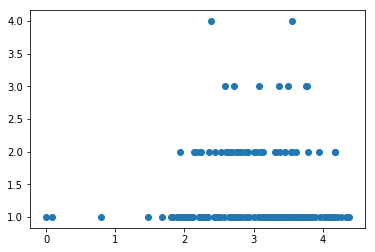

In [38]:
# 先保留2位小数
gpa2 = [round(x,2) for x in gpa]
gpa2 = Counter(gpa2)
plt.scatter(gpa2.keys(),gpa2.values())
plt.show()

In [17]:
from collections import Counter

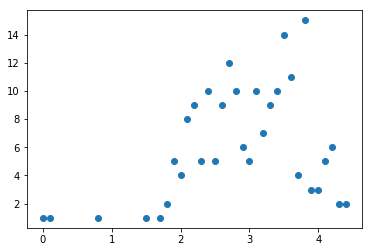

In [39]:
# 再保留1位小数
gpa1 = [round(x,1) for x in gpa]
gpa1 = Counter(gpa1)
plt.scatter(gpa1.keys(),gpa1.values())
plt.show()

## 下面的代码以2013级通信专业某学期的单门课(共8门课)绩点为例,绘制了分布图

In [41]:
sql2 = "select student_name,course_name,gpa from exam_mark_rank_all where speciality_code='0403' and not gpa is null"
df2 = jutil.load_pd_df(sql2)
df2.head()

,course_name,gpa,student_name
0,计算机网络,2.7,韩月月
1,形势与政策7,2.7,韩月月
2,DSP原理与应用,2.0,韩月月
3,计算机网络工程实验,3.3,韩月月
4,通信工程实验,3.7,韩月月


In [51]:
groupd = df2.groupby('course_name')
groupd.get_group('计算机网络')

gpa3 = []
for name,group in groupd:
    gpa3.append(list(group['gpa']))
len(gpa3)

8

[0.0, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]
[0.0, 2.3, 2.7, 3.0, 3.7]
[0.0, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]
[0.0, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]
[0.0, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]
[0.0, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]
[0.0, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]
[0.0, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]


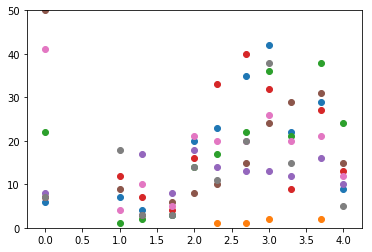

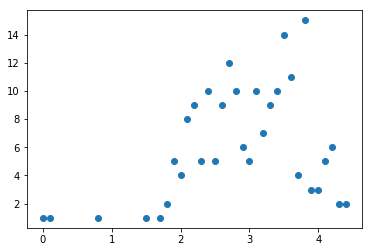

In [71]:
for g in gpa3:
    gg = [round(x,1) for x in g]
    gg = Counter(gg)
    print(sorted(gg.keys()))
    plt.scatter(gg.keys(),gg.values())
plt.ylim((0,50))
plt.show()
plt.scatter(gpa1.keys(),gpa1.values())
plt.show()

## 下面尝试曲线拟合效果

In [80]:
def fit_draw(d_gpa,is_draw=True):
    gnow = dict(sorted(d_gpa.items()))
    x = list(gnow.keys())
    y = list(gnow.values())
    z1 = np.polyfit(x,y,3)
    yval = np.polyval(z1,x)
    plot1=plt.plot(x, y, '*',label='old')
    plot2=plt.plot(x, yval,label='new')
    if is_draw:
        plt.show()

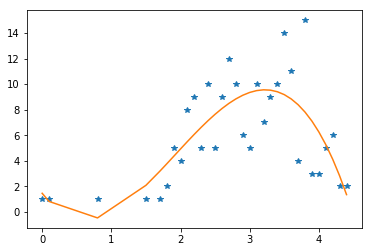

In [81]:
# 先拟合总的
fit_draw(gpa1)

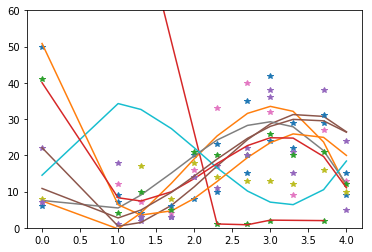

In [82]:
# 再拟合分的
for g in gpa3:
    gg = [round(x,1) for x in g]
    gg = Counter(gg)
    fit_draw(gg,is_draw=False)
plt.ylim((0,60))
plt.show()